<a href="https://colab.research.google.com/github/m-zayed5722/Miscellaneous-Projects/blob/main/Games_Misc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1. number Guessing
import random

def play_game():
    secret_number = random.randint(1, 100)
    attempts = 0
    previous_distance = None

    print("🎯 Welcome to the Number Guessing Game!")
    print("I am thinking of a number between 1 and 100.")
    print("Type 'q' to quit.\n")

    while True:
        guess = input("Enter your guess: ")

        if guess.lower() == 'q':
            print(f"👋 You quit! The number was {secret_number}.")
            break

        if not guess.isdigit():
            print("❌ Please enter a valid number.")
            continue

        guess = int(guess)
        attempts += 1
        distance = abs(secret_number - guess)

        if guess == secret_number:
            print(f"🎉 Correct! You guessed it in {attempts} attempts.")
            break

        if distance <= 5:
            hint = "🔥 Very hot!"
        elif distance <= 10:
            hint = "🌡 Warm"
        else:
            hint = "❄ Cold"

        if previous_distance is not None:
            if distance < previous_distance:
                hint += " (Getting closer!)"
            else:
                hint += " (Getting farther...)"

        previous_distance = distance
        print(hint)

# Start the game
play_game()


🎯 Welcome to the Number Guessing Game!
I am thinking of a number between 1 and 100.
Type 'q' to quit.

Enter your guess: 5
❄ Cold
Enter your guess: 3
❄ Cold (Getting farther...)
Enter your guess: 2
❄ Cold (Getting farther...)
Enter your guess: 1
❄ Cold (Getting farther...)
Enter your guess: 5
❄ Cold (Getting closer!)
Enter your guess: 6
❄ Cold (Getting closer!)
Enter your guess: 7
❄ Cold (Getting closer!)
Enter your guess: 8
❄ Cold (Getting closer!)
Enter your guess: 9
❄ Cold (Getting closer!)
Enter your guess: 55
❄ Cold (Getting closer!)
Enter your guess: 88
❄ Cold (Getting farther...)
Enter your guess: 66
❄ Cold (Getting closer!)
Enter your guess: 77
❄ Cold (Getting farther...)
Enter your guess: 70
❄ Cold (Getting closer!)
Enter your guess: 71
❄ Cold (Getting farther...)
Enter your guess: 69
❄ Cold (Getting closer!)
Enter your guess: 68
❄ Cold (Getting closer!)
Enter your guess: 67
❄ Cold (Getting closer!)
Enter your guess: 66
❄ Cold (Getting closer!)
Enter your guess: 63
❄ Cold (Get

In [2]:
#2. tic tac toe
import random

def print_board(board):
    print()
    print(f" {board[0]} | {board[1]} | {board[2]}")
    print("---+---+---")
    print(f" {board[3]} | {board[4]} | {board[5]}")
    print("---+---+---")
    print(f" {board[6]} | {board[7]} | {board[8]}")
    print()

def check_winner(board, player):
    win_combos = [
        (0,1,2),(3,4,5),(6,7,8),
        (0,3,6),(1,4,7),(2,5,8),
        (0,4,8),(2,4,6)
    ]
    return any(board[a] == board[b] == board[c] == player for a,b,c in win_combos)

def is_draw(board):
    return " " not in board

def get_human_move(board):
    while True:
        move = input("Choose position (1-9) or 'q' to quit: ")
        if move.lower() == 'q':
            return None
        if move.isdigit():
            move = int(move) - 1
            if 0 <= move <= 8 and board[move] == " ":
                return move
        print("❌ Invalid move. Try again.")

def get_ai_move(board):
    # 1. Win if possible
    for i in range(9):
        if board[i] == " ":
            board[i] = "O"
            if check_winner(board, "O"):
                board[i] = " "
                return i
            board[i] = " "

    # 2. Block player win
    for i in range(9):
        if board[i] == " ":
            board[i] = "X"
            if check_winner(board, "X"):
                board[i] = " "
                return i
            board[i] = " "

    # 3. Take center
    if board[4] == " ":
        return 4

    # 4. Take corners
    corners = [0, 2, 6, 8]
    available = [c for c in corners if board[c] == " "]
    if available:
        return random.choice(available)

    # 5. Random move
    return random.choice([i for i in range(9) if board[i] == " "])

def play_tic_tac_toe():
    board = [" "] * 9
    print("🎮 Welcome to Tic-Tac-Toe!")
    print("You are ❌ (X). Computer is ⭕ (O).")
    print("Board positions:")
    print("1 | 2 | 3\n4 | 5 | 6\n7 | 8 | 9")

    while True:
        print_board(board)

        move = get_human_move(board)
        if move is None:
            print("👋 Game exited.")
            break

        board[move] = "X"
        if check_winner(board, "X"):
            print_board(board)
            print("🎉 You win!")
            break

        if is_draw(board):
            print_board(board)
            print("🤝 It's a draw!")
            break

        ai_move = get_ai_move(board)
        board[ai_move] = "O"
        print(f"🤖 Computer chose position {ai_move + 1}")

        if check_winner(board, "O"):
            print_board(board)
            print("💻 Computer wins!")
            break

        if is_draw(board):
            print_board(board)
            print("🤝 It's a draw!")
            break

# Start game
play_tic_tac_toe()


🎮 Welcome to Tic-Tac-Toe!
You are ❌ (X). Computer is ⭕ (O).
Board positions:
1 | 2 | 3
4 | 5 | 6
7 | 8 | 9

   |   |  
---+---+---
   |   |  
---+---+---
   |   |  

Choose position (1-9) or 'q' to quit: 3
🤖 Computer chose position 5

   |   | X
---+---+---
   | O |  
---+---+---
   |   |  

Choose position (1-9) or 'q' to quit: 1
🤖 Computer chose position 2

 X | O | X
---+---+---
   | O |  
---+---+---
   |   |  

Choose position (1-9) or 'q' to quit: 8
🤖 Computer chose position 9

 X | O | X
---+---+---
   | O |  
---+---+---
   | X | O

Choose position (1-9) or 'q' to quit: 4
🤖 Computer chose position 7

 X | O | X
---+---+---
 X | O |  
---+---+---
 O | X | O

Choose position (1-9) or 'q' to quit: 6

 X | O | X
---+---+---
 X | O | X
---+---+---
 O | X | O

🤝 It's a draw!


/tmp/ipython-input-1998556132.py:83: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, update, interval=200)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128013 (\N{SNAKE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


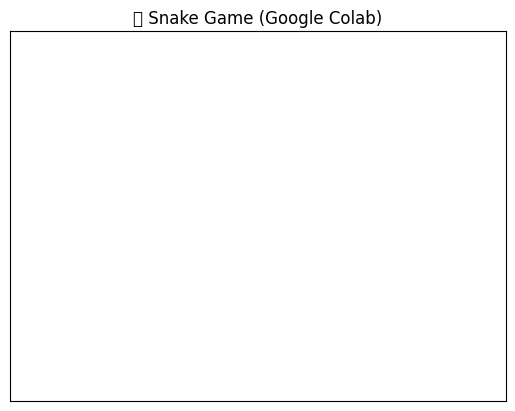

In [3]:
#3. Snake game

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

# Grid size
GRID_SIZE = 20

# Directions
UP = (0, 1)
DOWN = (0, -1)
LEFT = (-1, 0)
RIGHT = (1, 0)
DIRECTIONS = [UP, DOWN, LEFT, RIGHT]

# Initial snake
snake = [(10, 10), (9, 10), (8, 10)]
direction = RIGHT

# Food
food = (random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1))

game_over = False
score = 0

fig, ax = plt.subplots()
ax.set_xlim(0, GRID_SIZE)
ax.set_ylim(0, GRID_SIZE)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("🐍 Snake Game (Google Colab)")

snake_plot, = ax.plot([], [], 'gs', markersize=10)
food_plot, = ax.plot([], [], 'rs', markersize=10)
text = ax.text(0.02, 0.95, "", transform=ax.transAxes)

def random_turn(current_dir):
    possible = [d for d in DIRECTIONS if d != (-current_dir[0], -current_dir[1])]
    return random.choice(possible)

def update(frame):
    global snake, direction, food, game_over, score

    if game_over:
        text.set_text(f"💀 Game Over! Score: {score}")
        return snake_plot, food_plot, text

    # Occasionally change direction
    if random.random() < 0.2:
        direction = random_turn(direction)

    head_x, head_y = snake[0]
    dx, dy = direction
    new_head = (head_x + dx, head_y + dy)

    # Collision with wall or self
    if (
        new_head[0] < 0 or new_head[0] >= GRID_SIZE or
        new_head[1] < 0 or new_head[1] >= GRID_SIZE or
        new_head in snake
    ):
        game_over = True
        return snake_plot, food_plot, text

    snake.insert(0, new_head)

    # Eat food
    if new_head == food:
        score += 1
        food = (random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1))
    else:
        snake.pop()

    xs = [x + 0.5 for x, y in snake]
    ys = [y + 0.5 for x, y in snake]
    snake_plot.set_data(xs, ys)
    food_plot.set_data(food[0] + 0.5, food[1] + 0.5)

    text.set_text(f"Score: {score}")
    return snake_plot, food_plot, text

ani = animation.FuncAnimation(fig, update, interval=200)
plt.show()
